# The COVID flu diagnostic dataset

The dataset for this case study consists of patients who came into a doctor presenting with an illness. Features represent information about
the patient as well as symptoms they are presenting.

We can diagnose either:
- COVID-19—A disease caused by SARS-CoV-2
- H1N1—A subtype of influenza

Let's have a look at the first five rows of our covid_flu dataset.

In [1]:
import pandas as pd
import numpy as np 
np.random.seed(0)

covid_flu = pd.read_csv('data/covid_flu.csv')
covid_flu.head() 

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Something that stands out immediately is the number of NaN values in our data, which indicate values that are missing. That will be the first thing we deal with. Let’s see what percent of values are missing for each feature:

In [2]:
covid_flu.isnull().mean() 

Diagnosis                      0.000000
InitialPCRDiagnosis            0.929825
Age                            0.018893
Sex                            0.051282
neutrophil                     0.930499
serumLevelsOfWhiteBloodCell    0.898111
lymphocytes                    0.894737
CReactiveProteinLevels         0.907557
DurationOfIllness              0.941296
CTscanResults                  0.892713
RiskFactors                    0.858974
GroundGlassOpacity             0.937247
Diarrhea                       0.696356
Fever                          0.377193
Coughing                       0.420378
ShortnessOfBreath              0.949393
SoreThroat                     0.547908
NauseaVomitting                0.715924
Temperature                    0.576248
Fatigue                        0.641700
dtype: float64

Every single feature in our model has some missing data, with some features missing over 90% of their values

Let’s see a percent breakdown of our categories:

In [3]:
covid_flu['Diagnosis'].value_counts(normalize=True) 

Diagnosis
H1N1       0.723347
COVID19    0.276653
Name: proportion, dtype: float64

Our most common category is H1N1, with just over 72% of our response variable belonging to that category.

we will want to get a sense of which columns are quantitative and which are qualitative. We will want to do this for virtually every tabular dataset we investigate for ML because this will help us better understand which feature engineering techniques we can and should apply to which columns.

In [4]:
covid_flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

Let's start with grabbing the quantitative data:

In [5]:
covid_flu["CReactiveProteinLevels"] = covid_flu["CReactiveProteinLevels"].apply(lambda x: x if isinstance(x, float) else float(x.split()[0]))

In [6]:
numeric_types = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']  # the numeric types in Pandas
numerical_columns = covid_flu.select_dtypes(include=numeric_types).columns.tolist()
numerical_columns

['Age',
 'neutrophil',
 'serumLevelsOfWhiteBloodCell',
 'lymphocytes',
 'CReactiveProteinLevels',
 'DurationOfIllness',
 'Temperature']

grabbing our categorical columns and putting them in a list, as shown in the following listing:

In [7]:
categorical_types = ['O'] # The "object" type in pandas
categorical_columns = covid_flu.select_dtypes(
include=categorical_types).columns.tolist()
categorical_columns.remove('Diagnosis')
for categorical_column in categorical_columns:
    print('=======')
    print(categorical_column)
    print('=======')
    print(covid_flu[categorical_column].value_counts(dropna=False))

InitialPCRDiagnosis
InitialPCRDiagnosis
NaN    1378
Yes     100
No        4
Name: count, dtype: int64
Sex
Sex
M      748
F      658
NaN     76
Name: count, dtype: int64
CTscanResults
CTscanResults
NaN    1323
Yes     144
No       15
Name: count, dtype: int64
RiskFactors
RiskFactors
NaN                                                                   1273
asthma                                                                  36
pneumonia                                                               21
immuno                                                                  21
diabetes                                                                16
                                                                      ... 
diabetes, Hypertension                                                   1
Hypertension, Heart Disease, chronic obstructive pulmonary disease       1
rheumatoid arthritis                                                     1
hematological disease, immuno, Renal Disea

Let's look at Histograms of quantitative features:

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'neutrophil'}>,
        <Axes: title={'center': 'serumLevelsOfWhiteBloodCell'}>],
       [<Axes: title={'center': 'lymphocytes'}>,
        <Axes: title={'center': 'CReactiveProteinLevels'}>,
        <Axes: title={'center': 'DurationOfIllness'}>],
       [<Axes: title={'center': 'Temperature'}>, <Axes: >, <Axes: >]],
      dtype=object)

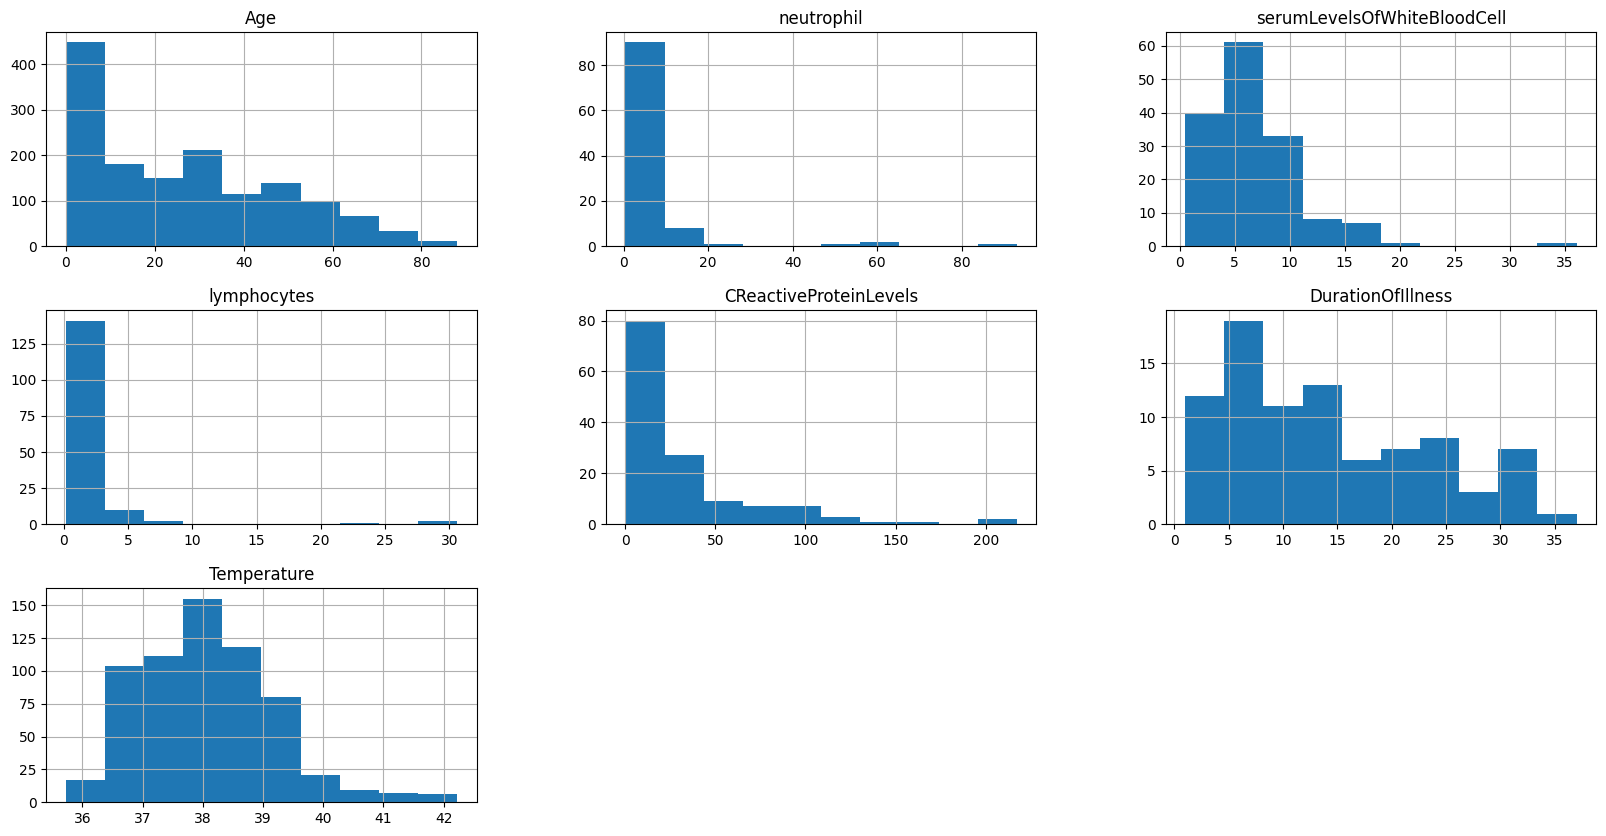

In [8]:
covid_flu[numerical_columns].hist(figsize=(20, 10)) 

before any transformations, scales are all over the place as are means and standard deviations

In [9]:
covid_flu[numerical_columns].describe()  

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,137.000000,87.000000,628.000000
mean,26.471040,6.854078,6.885159,1.850154,30.248759,13.988506,38.068312
std,21.487982,12.690131,4.346668,3.956668,39.409941,9.043171,1.094468
min,0.000000,0.446000,0.500000,0.130000,0.200000,1.000000,35.722222
25%,7.000000,2.160000,3.995000,0.637500,5.100000,7.000000,37.222222
50%,24.000000,3.310000,5.690000,0.905500,14.900000,12.000000,38.000000
75%,42.000000,6.645000,9.155000,1.605000,38.370000,20.000000,38.722222
max,88.000000,93.000000,36.070000,30.600000,217.170000,37.000000,42.222222


Turn our Sex column into a binary column:

In [10]:
covid_flu['Female'] = covid_flu['Sex'] == 'F'
del covid_flu['Sex']

Use the replace feature in pandas to replace Yes with True and No with False everywhere in our dataset:

In [11]:
covid_flu = covid_flu.replace({'Yes': True, 'No': False})  # replace yes and  no with True / False
covid_flu.head(3)

,Diagnosis,InitialPCRDiagnosis,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Female
0,H1N1,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,False,NaN,38.111111,False,True
1,H1N1,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,H1N1,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [12]:
binary_features = ['Female', 'GroundGlassOpacity', 'CTscanResults', 'Diarrhea', 'Fever',
    'Coughing', 'SoreThroat', 'NauseaVomitting', 'Fatigue', 'InitialPCRDiagnosis'
]

A custom data transformer to deal with our messy risk factor column:

In [13]:
covid_flu["RiskFactors"].value_counts()

RiskFactors
asthma                                                                36
immuno                                                                21
pneumonia                                                             21
diabetes                                                              16
chronic                                                               11
                                                                      ..
diabetes, Hypertension                                                 1
Hypertension, Heart Disease, chronic obstructive pulmonary disease     1
rheumatoid arthritis                                                   1
asthma, chronic, diabetes                                              1
Lung Disease                                                           1
Name: count, Length: 63, dtype: int64

In [14]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer  # class to help make dummy variables
from functools import reduce

class DummifyRiskFactor(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.label_binarizer = None
        
    def parse_risk_factors(self, comma_sep_factors):
        ''' asthma,heart disease -> ['asthma', 'heart disease'] '''
        try:
            return [s.strip().lower() for s in comma_sep_factors.split(',')]
        except:
            return []
    
    def fit(self, X, y=None):
        self.label_binarizer = MultiLabelBinarizer()
        self.label_binarizer.fit(X.apply(self.parse_risk_factors))  # create dummy variable for each risk factor
        return self
    
    def transform(self, X, y=None):
        return self.label_binarizer.transform(X.apply(self.parse_risk_factors))

In [15]:
drf = DummifyRiskFactor()

risks = drf.fit_transform(covid_flu['RiskFactors'])

print(risks.shape)

pd.DataFrame(risks, columns=drf.label_binarizer.classes_)

(1482, 41)


,asthma,athero,atopic dermatitis and repetitive respiratory infections,begin tumor (removed),chronic,chronic endrocrine disorder,chronic liver dieseas,chronic liver disorder,chronic neurological disorders,chronic obstructive pulmonary disease,...,lung disease,myxoma of abdominal cavity,obesity,pneumomediastinum and subcutaneous emphysema,pneumonia,pre-eclampsia,prom,renal disease,respiratory disease,rheumatoid arthritis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To effectively train an ML pipeline that can generalize well to unseen data is to follow the train/test split paradigm

In [16]:
from sklearn.model_selection import train_test_split

X, y = covid_flu.drop(['Diagnosis'], axis=1), covid_flu['Diagnosis']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, test_size=.2
)

Creating feature engineering pipelines:

In [17]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer

# deal with risk factors

risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['RiskFactors'])),
        ('dummify', DummifyRiskFactor())
    ]
)

# deal with binary columns

binary_pipeline = Pipeline(
    [
        ('select_categorical_features', FunctionTransformer(lambda df: df[binary_features])),
        ('fillna', SimpleImputer(strategy='constant', fill_value=False))  # assume missing values are not present
    ]
)

# deal with numerical columns

numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='median')),
    ]
)

Using only numerical features:

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
params = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy']
}
base_model = DecisionTreeClassifier()

model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
parsed_x_train = numerical_pipeline.fit_transform(x_train, y_train)
parsed_x_test = numerical_pipeline.transform(x_test)
model_grid_search.fit(parsed_x_train, y_train)
best_model = model_grid_search.best_estimator_
print(classification_report(y_true=y_test, y_pred=best_model.predict(parsed_x_test)))

              precision    recall  f1-score   support

     COVID19       0.72      0.73      0.73        82
        H1N1       0.90      0.89      0.90       215

    accuracy                           0.85       297
   macro avg       0.81      0.81      0.81       297
weighted avg       0.85      0.85      0.85       297



Using only binary risk factors:

In [19]:
model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
parsed_x_train = risk_factor_pipeline.fit_transform(x_train, y_train)
parsed_x_test = risk_factor_pipeline.transform(x_test)
model_grid_search.fit(parsed_x_train, y_train)
best_model = model_grid_search.best_estimator_
print(classification_report(y_true=y_test, y_pred=best_model.predict(parsed_x_test)))


              precision    recall  f1-score   support

     COVID19       0.73      0.10      0.17        82
        H1N1       0.74      0.99      0.85       215

    accuracy                           0.74       297
   macro avg       0.73      0.54      0.51       297
weighted avg       0.74      0.74      0.66       297



c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Using only categorical features:

In [20]:
model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
parsed_x_train = binary_pipeline.fit_transform(x_train, y_train)
parsed_x_test = binary_pipeline.transform(x_test)
model_grid_search.fit(parsed_x_train, y_train)
best_model = model_grid_search.best_estimator_
print(classification_report(y_true=y_test, y_pred=best_model.predict(parsed_x_test)))

              precision    recall  f1-score   support

     COVID19       0.78      0.61      0.68        82
        H1N1       0.86      0.93      0.90       215

    accuracy                           0.85       297
   macro avg       0.82      0.77      0.79       297
weighted avg       0.84      0.85      0.84       297



Combining all features together:

In [21]:
simple_fe = FeatureUnion([  # put all of our features together
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

simple_fe.fit_transform(x_train, y_train).shape
model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
parsed_x_train = simple_fe.fit_transform(x_train, y_train)
parsed_x_test = simple_fe.transform(x_test)
model_grid_search.fit(parsed_x_train, y_train)
best_model = model_grid_search.best_estimator_
print(classification_report(y_true=y_test, y_pred=best_model.predict(parsed_x_test)))

              precision    recall  f1-score   support

     COVID19       0.84      0.87      0.85        82
        H1N1       0.95      0.93      0.94       215

    accuracy                           0.92       297
   macro avg       0.89      0.90      0.90       297
weighted avg       0.92      0.92      0.92       297



c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Changing some transformations in the pipelines:

In [22]:
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='mean')),  # try mean instead of median
        ('scale', StandardScaler())  # scale our numerical features
    ]
)

simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

# gained some precision for the COVID class
model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
parsed_x_train = simple_fe.fit_transform(x_train, y_train)
parsed_x_test = simple_fe.transform(x_test)
model_grid_search.fit(parsed_x_train, y_train)
best_model = model_grid_search.best_estimator_
print(classification_report(y_true=y_test, y_pred=best_model.predict(parsed_x_test)))

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


              precision    recall  f1-score   support

     COVID19       0.86      0.87      0.86        82
        H1N1       0.95      0.94      0.95       215

    accuracy                           0.92       297
   macro avg       0.90      0.91      0.90       297
weighted avg       0.92      0.92      0.92       297



In [23]:
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='constant', fill_value=999)),  # try a constant 999
        ('scale', StandardScaler())
    ]
)

simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

# gained some precision for the COVID class
model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
parsed_x_train = simple_fe.fit_transform(x_train, y_train)
parsed_x_test = simple_fe.transform(x_test)
model_grid_search.fit(parsed_x_train, y_train)
best_model = model_grid_search.best_estimator_
print(classification_report(y_true=y_test, y_pred=best_model.predict(parsed_x_test)))

              precision    recall  f1-score   support

     COVID19       0.89      0.85      0.87        82
        H1N1       0.94      0.96      0.95       215

    accuracy                           0.93       297
   macro avg       0.92      0.91      0.91       297
weighted avg       0.93      0.93      0.93       297



c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


The contents were heavily inspired by the book: "Feature Engineering BookCamp" By Sinan Ozdemir